<a href="https://colab.research.google.com/github/Khabbab172/dsa-python/blob/main/DSA_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class MinHeap:

  def __init__(self) -> None:
    self.heap = []

  def parent(self , i ):
    return (i - 1)//2

  def left(self , i):
    return (2*i + 1)

  def right(self , i):
    return (2*i + 2)

  def insert(self , v ):
    self.heap.append(v)
    i = len(self.heap) - 1
    while i != 0 and self.heap[self.parent(i)] > self.heap[i]:
      self.heap[self.parent(i)] ,  self.heap[i] =  self.heap[i] ,self.heap[self.parent(i)]
      i = self.parent(i)

  def heapify(self , i):
    smallest = i
    left = self.left(i)
    right = self.right(i)
    size = len(self.heap)

    if  left < size and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < size and self.heap[right] < self.heap[smallest]:
      smallest = right

    if smallest != i:
      self.heap[smallest] ,  self.heap[i] =  self.heap[i] ,self.heap[smallest]
      self.heapify(smallest)


  def extract_min(self):
    if not self.heap:
      return None
    if len(self.heap) == 1:
      return self.heap.pop()

    root = self.heap[0]
    self.heap[0] = self.heap.pop()
    self.heapify(0)
    return root

  def decrease_key(self , index , value):
    self.heap[index] = value
    while index != 0 and self.heap[index] < self.heap[self.parent(index)]:
      self.heap[index] , self.heap[self.parent(index)] = self.heap[self.parent(index)] , self.heap[index]
      index = self.parent(index)

  def delete(self , index):

    self.decrease_key(index ,  float('-inf'))
    self.extract_min()

  def BuildHeap(self, A):
    self.heap = A[:]
    last_internal_node  = (len(A)-2)//2
    for index in range(last_internal_node  , -1 , -1):
      self.heapify(index)

  def printHeap(self):
    print(self.heap)


h = MinHeap()
h.insert(10)
h.insert(20)
h.insert(30)
h.insert(15)
h.insert(40)
h.insert(18)

h.printHeap()
print(h.extract_min())
# h.decrease_key(3 , 60)

h.printHeap()

# h.delete(4)

# h.printHeap()

# h.BuildHeap([5 , 6 , 7 , 1 , 2 , 3 , 4])

# h.printHeap()



[10, 15, 18, 20, 40, 30]
10
[15, 20, 18, 30, 40]


In [ ]:

class Node:

  def __init__(self, value) -> None:
    self.value = value
    self.next  = None

class LinkedList:

  def __init__(self) -> None:
    self.size = 0
    self.head = None
    self.current = None

  def insert(self ,position , value ):
    if position <= 0 and position > self.size + 1:
      print("Invalid position !")
      return
    new_node =  Node(value)

    if position == 1:
      new_node.next = self.head
      self.head = new_node
      self.size += 1
      return


    current = self.head
    current_position = 1
    while current_position < (position - 1):
      current = current.next
      current_position += 1
    new_node = Node(value)
    new_node.next = current.next
    current.next = new_node
    self.size += 1

  def prepend(self , value):
    new_node =  Node(value)
    new_node.next = self.head
    self.head = new_node
    self.size += 1

  def append(self , value):
    new_node = Node(value)

    if self.size == 0:
      self.head  = new_node
      self.current = new_node
    else :
      self.current.next = new_node
      self.current = new_node

    self.size += 1

  def sortedInsert(self , value ):
    new_node = Node(value)
    current = self.head

    if self.head is None:
      self.head = new_node
      self.size += 1
      return

    if self.head.value > value:
      new_node.next = self.head
      self.head = new_node
      self.size += 1
      return

    while current.next is not None and current.next.value < value :
      current = current.next

    new_node.next = current.next
    current.next = new_node
    self.size += 1

  def traverse(self):
    current  = self.head
    while current is not None:
      print(current.value)
      current  = current .next

  def _traverse_recursive(self, current):

    if current is None:
      return
    print(current.value)
    self._traverse_recursive(current.next)

  def traverse_recursive(self):
    self._traverse_recursive(self.head)

  def search(self, value):
    current = self.head
    position = 1
    while current is not None :
      if current.value == value:
        return position
      position += 1
      current = current.next

  def search_recursive(self , value):
    def _search_recursive(node  , value , position):
      if node is None:
        return
      if node.value == value:
        return position

      return _search_recursive(node.next , value , position + 1 )

    return _search_recursive(self.head , value , 1 )

  def deleteHead(self):
    if self.head == None:
      return None
    removed_node = self.head
    self.head = self.head.next
    self.size -= 1
    return removed_node.value

  def deleteTail(self):
    current = self.head
    while current.next.next is not None:
      current = current.next
    self.size -= 1
    current.next = None

  def getMiddle(self):

    if self.head is None:
      return None

    slow_pointer = self.head
    fast_pointer = self.head

    while fast_pointer is not None and fast_pointer.next is not None:
      slow_pointer = slow_pointer.next
      fast_pointer = fast_pointer.next.next

    return slow_pointer.value

  def getNthValueFromEnd(self , position):

    slow_pointer = self.head
    fast_pointer = self.head

    if self.head is None and position <= 0:
      return None

    current_position = 1
    while current_position < position:
      if fast_pointer is None:
        return None
      fast_pointer = fast_pointer.next
      current_position += 1

    while fast_pointer is not None and fast_pointer.next is not None:
      slow_pointer = slow_pointer.next
      fast_pointer = fast_pointer.next

    return slow_pointer.value

  def reverse(self):
    current = self.head
    previous = None

    while current is not None:

      next_node = current.next

      current.next =  previous

      previous = current
      current = next_node

    self.head = previous


  def _reverse_recursive(self, current , previous):

    if current is None:
      return previous

    next_node = current.next

    current.next = previous

    previous = current

    current = next_node

    return self._reverse_recursive(current , previous )


  def reverse_recursive(self):
    current = self.head
    previous = None
    self.head = self._reverse_recursive(current , previous)

  def removeDuplicates(self):
    current = self.head
    while current is not None and current.next is not None :
      if current.value == current.next.value:
        current.next = current.next.next
        self.size -= 1
      else:
        current = current.next



ll = LinkedList()
ll.sortedInsert( 70)
ll.sortedInsert(60)
ll.sortedInsert(50)
ll.sortedInsert(40)
ll.sortedInsert(30)
ll.sortedInsert(20)
ll.sortedInsert(10)

# ll.insert(2 , 15)
# ll.sortedInsert(25)
# print( ll.search(20) )


# ll.traverse()
# ll.traverse_recursive()

# ll.prepend(1)
# ll.prepend(2)
# ll.prepend(3)
# ll.traverse()

# ll.deleteHead()
# ll.deleteTail()

ll.traverse()

# ll.reverse()
# ll.reverse_recursive()
print()

# ll.removeDuplicates()

ll.getNthValueFromEnd(3)

# ll.traverse()

# ll.traverse()

# print(ll.getMiddle())
# print(ll.getNthValueFromEnd(4))



10
20
30
40
50
60
70



50

In [ ]:
# New Section
class Node:

  def __init__(self, value) -> None:
    self.value = value
    self.next  = None

class CircularLinkedList:

  def __init__(self):
    self.size = 0
    self.head = None
    self.current = None

  def append(self , value ):
    new_node = Node(value)

    if self.size == 0:
      self.head = new_node
      self.head.next = self.head
      self.current = new_node
    else:
      self.current.next = new_node
      self.current = new_node

    self.size += 1

  def traverse(self):
    current = self.head
    # position = 1
    while current is not self.head : # position <= self.size:
      print(current.value)
      # position +=  1
      current = current.next





CL = CircularLinkedList()

CL.append(10)
CL.append(20)
CL.append(12000)

CL.traverse()

class XORNode:

  def __init__(self, value) -> None:
    self.value = value
    self.both  = 0


class XORLinkedList:

  def __init__(self) -> None:
    self.size = 0
    self.head = None
    self.tail = None

  def append(self , value):
    new_node = XORNode(value)

    if self.size == 0 :
      self.head = self.tail = new_node
      self.size += 1
    else:
      self.current


li = [1 , 2 , 3 , 4]
print(li)
li[0]
li[len(li)-1]







[1, 2, 3, 4]


4

In [ ]:
# Recursion

def fun(n):
  if n == 1:
    return 0
  else:
    return 1 + fun(int(n/2))
fun(31)
# print(int(1/2))

4

In [ ]:
def fun(n):
  if n==0:
    return
  print(n)
  fun(n-1)

fun(5)

5
4
3
2
1


In [ ]:
def fun(n , k):
  if n==0:
    return
  print(k)
  fun(n-1, k+1)
fun(5 ,  1)

1
2
3
4
5


In [ ]:
strng = "a"

def checkPalindrome(strng , s , e ):
  if s >= e:
    return True
  if strng[s] != strng[e]:
    return False

  return checkPalindrome(strng , s + 1 , e - 1)

s = 0
e = len(strng) -1
checkPalindrome(strng , s , e)

True

In [ ]:
num = 253

def sumDigits(n):
  if n == 0:
    return 0
  return int(n%10) + sumDigits(int(n/10))

sumDigits(num)

10

In [ ]:
num = 23
def cutRope(n , a , b , c):
  if n == 0:
    return 0
  if n <= -1:
    return -1
  res = max(cutRope(n - a , a , b , c) , cutRope(n - b , a , b , c) ,cutRope(n - c , a , b , c))
  if res == -1:
    return -1
  return 1 + res
cutRope(num , 9, 12 , 11)

2

In [ ]:
def subsets(s , curr , n , i):
  if n == i:
    print(curr)
    return

  subsets( s , curr + s[i] ,n,  i+1 )
  subsets( s , curr ,n,  i+1 )


subsets("ABC" , "" , len("ABC") , 0 )


ABC
AB
AC
A
BC
B
C



In [ ]:
def TOH(N , A , B , C  ):

  if N == 0:
    return 0

  if N == 1:
    print(f"move disk {N} from rod {A} to rod {B}")
    return 1

  cnt = TOH(N - 1, A , C , B  )
  print(f"move disk {N} from rod {A} to rod {B}")

  cnt +=  1

  cnt += TOH(N - 1, C , B , A  )

  return cnt



TOH(2, 1 , 2 , 3  )


move disk 1 from rod 1 to rod 3
move disk 2 from rod 1 to rod 2
move disk 1 from rod 3 to rod 2


3

In [ ]:
# Stack
class Stack:
  def __init__(self):
    self.stack = []

  def push(self ,  value ):
    self.stack.append(value)

  def pop(self):
    if not self.empty():
      self.stack.pop()
    else:
      print("stack is empty")



  def peek(self):
    return self.stack[-1]

  def empty(self):
    if self.stack:
      return False
    else:
      return True

  def size(self):
    return len(self.stack)


s = Stack();

s.pop()
# s.push(10)
# s.push(20)
# s.peek()
# s.push(30)
# s.peek()



stack is empty


In [ ]:
# linked list implemantation
class Node:
  def __init__(self , value):
    self.value = value
    self.next = None

class Stack:

  def __init__(self):
    self.size = 0
    self.head = None

  def push(self, value ):
    node = Node(value)

    if self.head is None:
      self.head = node
      self.size += 1
    else:
      node.next = self.head
      self.head = node
      self.size += 1

  def pop(self):
    if self.empty():
      print("stack is empty")
    else:
      data = self.head.value
      self.head = self.head.next
      self.size -= 1
      return data


  def peek(self):
    return self.head.value if self.head is not None else -1

  def empty(self):
    if self.size > 0:
      return False
    else:
      return True

  def size(self):
    return self.size

s = Stack()

s.push(10)
s.push(20)
s.push(30)
s.empty()
print(s.size)
s.pop()
s.pop()
s.pop()
# s.pop()
# s.peek()




3


10

In [ ]:
def reverse(s):
  stack = Stack()
  temp = ""
  for c in s:
    stack.push(c)

  for c in s:
    temp += stack.pop()

  return temp

reverse("khabbab")


'babbahk'

In [ ]:
def matching(a , b):
  return True if a == '(' and b == ')' or a == '{' and b == '}' or a == '[' and b == ']' else False


def validParenthesis(s):
  stack = Stack()

  for i in range(len(s)):
    print(stack.peek(), s[i])
    if ( s[i] == '[' ) or ( s[i] == '{')  or (s[i] == '(') :
      stack.push(s[i])
    else:
      print(" else : ",stack.peek(), s[i])
      if stack.empty():
        return False
      elif not matching(stack.peek(), s[i]):
        return False
      else:
        stack.pop()

  return stack.empty()

validParenthesis("([{}]])")

NameError: name 'Stack' is not defined

In [ ]:
# stock span

def stockSpan(A):

  for i in range(len(A)):
    cnt = 0
    for j in range(i, -1 , -1):
      # print(A[j] ,'<=' , A[i])
      if A[j] <= A[i]:
        cnt += 1
      else :
        break
    print(cnt , end=" ")

stockSpan([15 , 13 , 12 , 14 , 16 , 8 , 6 , 4 , 10 , 30 ])


1 1 1 3 5 1 1 1 4 10 

In [ ]:
# sock span using stack

def stockSpan(A):
  s = Stack()

  for i in range(len(A)):
    cnt = i
    # print(A[s.peek()] , A[i])
    while not s.empty() and A[s.peek()] <= A[i] :
      s.pop()

    if A[s.peek()] >= A[i]:
      cnt -= s.peek()
      print(cnt , end=" ")
      s.push(i)



stockSpan([15 , 13 , 12 , 14 , 16 , 8 , 6 , 4 , 10 , 30 ])


1 1 1 3 5 1 1 1 4 10 

In [ ]:
def prevGreater(A):
  for i in range(len(A)):
    j = i - 1
    while j >= 0:
      if j >= 0 and A[j] > A[i]:
        print(A[j] , end=" ")
        break
      j -= 1
    if j == -1:
        print(-1 , end=" ")

A = [15 , 10 , 18 , 12 , 4 , 6 , 2 , 8]
prevGreater(A)

-1 15 -1 18 12 12 6 12 

In [ ]:
# stack
def prevGreater(A):
  s = []
  s.append( A[0])
  for i in range(len(A)):
    while s and s[-1] <= A[i] :
      s.pop()


    print(s[-1] if s else -1 , end=" ")
    s.append(A[i])

A = [15 , 10 , 18 , 12 , 4 , 6 , 2 , 8]
# A = [20 , 30 , 10 , 5 ,15]
prevGreater(A)

-1 15 -1 18 12 12 6 12 

In [ ]:
# stack
def nextGreater(A):
  for i in range(len(A)):
    j = i + 1
    while j < len(A):
      if A[j] > A[i]:
        print(A[j] , end=" ")
        break
      j += 1
    if j >= len(A):
        print(-1 , end=" ")



# A = [15 , 10 , 18 , 12 , 4 , 6 , 2 , 8]
A = [5 , 15 , 10 , 8 , 6 , 12 , 9 , 18 ]
# A = [20 , 30 , 10 , 5 ,15]
nextGreater(A)

15 18 12 12 12 18 18 -1 

In [ ]:
def nextGreater(A):
  s = []
  t = []
  s.append(A[-1])
  for i in range(len(A) -1 , -1 , -1):
    while s and s[-1] <= A[i]:
      s.pop()


    t.append(s[-1] if s else -1 )
    s.append(A[i])

  for e in t[-1::-1]:
    print(e , end=" ")

A = [5 , 15 , 10 , 8 , 6 , 12 , 9 , 18 ]
nextGreater(A)

15 18 12 12 12 18 18 -1 

In [ ]:
# Queue

class Queue:
  def __init__(self):
    self.queue = []

  def enqueue(self , value):
    self.queue.append(value)

  def dequeue(self):
    v = self.queue[0] if self.queue else -1
    for i in range(1 , len(self.queue)):
      self.queue[i - 1] = self.queue[i]
    return v

  def front(self):
    return self.queue[0] if self.queue else -1

  def rear(self):
    return self.queue[-1] if self.queue else -1

  def size(self):
    return len(self.queue)

  def empty(self):
    return True if self.queue else False


q = Queue()
q.enqueue(10)
q.enqueue(20)
q.enqueue(30)
q.enqueue(40)

print(q.dequeue())
print(q.dequeue())

print(q.front())
print(q.front())

10
20
30
30


In [ ]:
class Queue:
  def __init__(self , cap):
    self.cap = cap
    self.queue = [None for i in range(self.cap) ]
    self.front = 0
    self.size = 0

  def empty(self):
    return True if self.size == 0 else False

  def getRear(self):
    if self.empty() :
      return -1
    else :
      return (self.front + self.size - 1)%self.cap

  def getFront(self):
    if self.empty() :
      return -1
    else :
      return self.front

  def full(self):
    return True if self.size == self.cap else False

  def enqueue(self , value):
    if self.full():
      return
    rear = (self.getRear() + 1) % self.cap
    self.queue[rear] = value
    self.size += 1

  def dequeue(self):
    if self.empty():
      return
    V = self.queue[self.front]
    self.queue[self.front] = None
    self.front = (self.front + 1)% self.cap
    self.size -= 1
    return V



q = Queue(3)

q.enqueue(10)
q.enqueue(20)
q.enqueue(30)

print(q.dequeue())
print(q.dequeue())
print(q.dequeue())

# print(q.queue)

# q.dequeue()
# q.dequeue()

# print(q.queue)

# q.enqueue(40)

# print(q.queue)

# q.dequeue()

# print(q.queue)




10
20
30


In [ ]:
# Queue using linked list
class Node:

  def __init__(self , value):
    self.value = value
    self.next = None


class Queue:
  def __init__(self):
    self.size = 0
    self.front = None
    self.rear = None

  def empty(self):
    if self.size == 0:
      return True
    else:
      return False

  def enqueue(self , value):
    new_node = Node(value)
    if self.empty():
      self.front = new_node
      self.rear = new_node
    else:
      self.rear.next = new_node
      self.rear = new_node

    self.size += 1

  def dequeue(self):
    if self.empty():
      return
    v = self.front.value
    self.front = self.front.next
    self.size -= 1
    return v



q = Queue()

q.enqueue(10)
q.enqueue(20)
q.enqueue(30)

print(q.dequeue())
print(q.dequeue())
print(q.dequeue())







10
20
30


In [ ]:
from collections import deque
# Trees
class Node:
  def __init__(self , value):
    self.value = value
    self.left = None
    self.right = None



class Tree:

  def __init__(self):
    self.root = None
    self.left = None
    self.right = None
    self.size = 0

  def add(self , value):
    new_node = Node(value)

    if self.root is None:
      self.root = new_node

    elif self.root.left is None:
      self.root.left = new_node

    elif self.root.right is None:
      self.root.right = new_node

    self.size += 1




  def inorder(self):
    if self.root is not None:
      root = self.root
      self._inorder(root)

  def _inorder(self, root):
    if root != None:
      self._inorder(root.left)
      print(root.value , end=" ")
      self._inorder(root.right)

  def preorder(self):
    if self.root is not None:
      root = self.root
      self._preorder(root)

  def _preorder(self , root ):
    if root !=  None:
      print(root.value , end=" ")
      self._preorder(root.left)
      self._preorder(root.right)

  def postorder(self):
    if self.root is not None:
      root = self.root
      self._postorder(root)

  def _postorder(self , root):
    if root != None:
      self._postorder(root.left)
      self._postorder(root.right)
      print(root.value , end=" ")

  def height(self):
    if self.root is not None:
      return self._height(self.root)
    else :
      return 0

  def _height(self, root):
    if root == None:
      return 0
    return 1 + max(self._height(root.left) , self._height(root.right))


t = Tree()

t.add("Root")
t.add("Left")
t.add("Right")


t.inorder()
print()
t.preorder()
print()
t.postorder()
print()
t.height()


r = Node(10)

r.left = Node(20)
r.right = Node(30)


r.left.left  = Node(40)
r.left.right = Node(50)

r.right.left = Node(60)
r.right.right = Node(70)
r.right.right.right = Node(80)


def printNodesAtDistK(root, k):
  if root == None:
    return
  if k == 0:
    print( root.value , end=" ")
  else:
    printNodesAtDistK( root.left, k -1)
    printNodesAtDistK( root.right, k -1)


# printNodesAtDistK(r, 2)


def height(root):
  if root == None:
    return 0
  return  max( height(root.left) , height(root.right) )+1

def levelOrderTraversalBrute(root , h):
  for i in range(h):
    printNodesAtDistK(root , i )

h = height(r)
# levelOrderTraversalBrute(r , h)


# using queue
def levelOrder(root):
  if root == None:
    return
  d = deque()
  d.append(root)
  while len(d) != 0 :
    curr = d[0]
    d.popleft()
    print(curr.value , end=" ")
    if curr.left != None:
      d.append(curr.left)
    if curr.right != None:
      d.append(curr.right)


# levelOrder(r)


def getSize(root):
  if root == None:
    return 0
  return 1 + getSize(root.left) + getSize(root.right)


def getMax(root):
  if root == None:
    return float("-inf")
  return max(root.value , getMax(root.left) ,getMax(root.right))

s = getMax(r)
# print(s)

def inorderItrative(root):
  s = []
  curr = root
  while curr != None or len(s) != 0:
    while curr != None:
      s.append(curr)
      curr = curr.left
    curr = s[-1]
    s.pop()
    print(curr.value , end=" ")
    curr = curr.right

def preorderItrative(root):
  curr = root
  s = []
  while curr != None or len(s) != 0:
    while curr != None:
      print(curr.value , end=" ")
      s.append(curr)
      curr = curr.left

    curr = s.pop()
    curr = curr.right
def preorderItrative2(root):
  if root == None:
    return
  s = []
  s.append(root)
  while s :
    curr = s.pop()
    print(curr.value , end=" ")
    if curr.right != None:
       s.append(curr.right)
    if curr.left != None:
      s.append(curr.left)

# inorderItrative(r)
preorderItrative(r)

Left Root Right 
Root Left Right 
Left Right Root 
10 20 40 50 30 60 70 80 

In [ ]:
# Binary Search Tree
from collections import deque
# Trees
class Node:
  def __init__(self , value):
    self.value = value
    self.left = None
    self.right = None

class BST:
  def __init__(self):
    self.height = 0
    self.size = 0
    self.root = None

  def insert(self , value):
    node = Node(value)
    parent = None
    if self.root == None:
      self.root = node
      return
    curr = self.root
    while curr != None:
      parent = curr
      if value > curr.value :
        curr = curr.right
      elif value < curr.value:
        curr = curr.left
      else:
        return self.root

    if parent == None:
      self.root = node
    elif parent.value > value:
      parent.left = node
    else:
      parent.right = node

  def recursive_insert(self , value):
    self.root = self._recursive_insert(self.root , value)

  def _recursive_insert(self, root , value):
    if root == None:
      return Node(value)
    elif root.value < value:
      root.right = self._recursive_insert(root.right , value)
    elif root.value > value:
      root.left = self._recursive_insert(root.left , value )
    return root

  def recursive_search(self , value):
    return self._recursive_search(self.root ,value )

  def _recursive_search(self , root , value):
    if root == None:
      return False
    elif root.value == value:
      return True
    elif root.value > value:
      return self._recursive_search(root.left , value)
    elif root.value < value:
      return self._recursive_search(root.right , value)

  def search(self , value):
    root = self.root
    while root != None:
      if root.value == value:
        return True
      elif root.value > value:
        root =  root.left
      elif root.value < value:
        root =  root.right
    return False

  def delete(self , value):
    self._delete(self.root , value)

  def _delete(self , root , value):
    if root == None:
      return None

    if root.value > value:
      root.left = self._delete(root.left , value)
    elif root.value < value:
      root.right = self._delete(root.right , value)
    else:
      if root.left == None:
        return root.right
      elif root.right == None:
        return root.left
      else:
        curr = root.right
        while curr !=  None and curr.left != None:
          curr = curr.left
        root.value = curr.value
        root.right =  self._delete(root.right , curr.value)
    return root

  def floor(self , value):
    return self._floor(self.root , value)
  def _floor(self, root , value):
    curr = root
    res = None
    while curr != None:
      if curr.value == value:
        return curr.value
      elif curr.value > value:
        curr = curr.left
      elif curr.value < value:
        res = curr.value
        curr = curr.right
    return res

  def ceil(self , value):
    return self._ceil( self.root , value)
  def _ceil(self , root , value):
    curr = root
    res = None
    while curr != None:
      if curr.value == value:
        return curr.value
      elif curr.value > value:
        res = curr.value
        curr = curr.left
      elif curr.value < value:
        curr = curr.right

    return res





def inorderItrative(root):
  s = []
  curr = root
  while curr != None or len(s) != 0:
    while curr != None:
      s.append(curr)
      curr = curr.left
    curr = s[-1]
    s.pop()
    print(curr.value , end=" ")
    curr = curr.right


bst = BST()

bst.insert(10)
bst.insert(5)
bst.insert(15)
bst.insert(12)
bst.insert(18)
bst.insert(20)

def preorderItrative(root):
  curr = root
  s = []
  while curr != None or len(s) != 0:
    while curr != None:
      print(curr.value , end=" ")
      s.append(curr)
      curr = curr.left

    curr = s.pop()
    curr = curr.right

# bst.delete(18)

inorderItrative(bst.root)  #  inorder traversel of bst is always sorted

# bst.recursive_search(-1)
# bst.search(10)


# bst.floor()
bst.ceil(14)

5 10 12 15 18 20 

15

In [ ]:
# sliding window
from collections import defaultdict
def countOccrofAnagrams(s , pat):
  length = len(pat)
  map = defaultdict(int)
  for c in pat:
    map[c] += 1

  count = 0
  for i in range(len(s)):
    for j in range(i , (i + len(pat) -1)%len(s)):
      if s[j] not in map:
         flag = False
      else:
        flag = True
    if flag:
      count += 1

  return count


s = "forxxorfxdofr"
pat = "for"


countOccrofAnagrams(s , pat)



9

In [ ]:
from collections import defaultdict
txt = "forxxorfxdofr"
pat = "for"
count = 0

for i in range(len(txt) - len(pat)+1):
  m = defaultdict(int)
  for c in pat:
    m[c] += 1

  for j in range(i , i + len(pat)):
    m[txt[j]] -= 1

  if all(value == 0 for value in m.values()):
    print(m)
    count += 1

print(count)

defaultdict(<class 'int'>, {'f': 0, 'o': 0, 'r': 0})
defaultdict(<class 'int'>, {'f': 0, 'o': 0, 'r': 0})
defaultdict(<class 'int'>, {'f': 0, 'o': 0, 'r': 0})
3


In [ ]:
from collections import defaultdict
def search(pat, txt):

  count = 0
  i = 0
  j = 0
  m = defaultdict(int)
  for c in pat:
    m[c] += 1

  while j < len(txt):
    # print(m ,  j - i + 1 , j , i)

    if txt[j] in m:
      m[txt[j]] -= 1


    if j - i + 1 < len(pat):
      j += 1

    elif j - i + 1 == len(pat):
      if all(v==0 for v in m.values()):
        count += 1

      if txt[i] in m:
        m[txt[i]] += 1
      i += 1
      j += 1

  return count


search("for" , "forxxorfxdofr")
search("aaba", "aabaabaa")

4

In [ ]:
# --- INPUTS ---
plant_capacity_tpd = 50
working_days = 240

# Crop distribution (%)
soy_ratio = 0.50
sun_ratio = 0.30
gnut_ratio = 0.20

# Oil yield assumptions (as % of seed weight)
oil_yield = {
    'soybean': 0.18,
    'sunflower': 0.38,
    'groundnut': 0.44
}

# Market prices (USD/tonne)
oil_price = 1000
cake_price = 500

# Cost assumptions (USD)
seed_cost = {
    'soybean': 300,
    'sunflower': 400,
    'groundnut': 500
}
labor_cost = 100000  # Annual
utilities = 70000
solvent_loss_cost = 30000
maintenance = 40000
misc = 30000

# --- CALCULATIONS ---
total_seed = plant_capacity_tpd * working_days  # Total raw material per year

# Distribute seeds
soy = total_seed * soy_ratio
sun = total_seed * sun_ratio
gnut = total_seed * gnut_ratio

# Oil production (tonnes)
oil_total = (
    soy * oil_yield['soybean'] +
    sun * oil_yield['sunflower'] +
    gnut * oil_yield['groundnut']
)

# Oilcake = remaining material
cake_total = total_seed - oil_total

# Revenue
revenue = oil_total * oil_price + cake_total * cake_price

# Raw material cost
raw_cost = (
    soy * seed_cost['soybean'] +
    sun * seed_cost['sunflower'] +
    gnut * seed_cost['groundnut']
)

# Total operating cost
total_cost = raw_cost + labor_cost + utilities + solvent_loss_cost + maintenance + misc

# Profit
profit = revenue - total_cost

# --- OUTPUT ---
print("====== Oil Extraction Plant Financial Summary ======")
print(f"Total Seed Processed: {total_seed} tonnes")
print(f"  - Soybean: {soy:.1f} t, Sunflower: {sun:.1f} t, Groundnut: {gnut:.1f} t")
print(f"Oil Produced: {oil_total:.1f} tonnes")
print(f"Oilcake Produced: {cake_total:.1f} tonnes")
print(f"Revenue: ${revenue:,.2f}")
print(f"Total Operating Cost: ${total_cost:,.2f}")
print(f"Net Profit: ${profit:,.2f}")

====== Oil Extraction Plant Financial Summary ======
Total Seed Processed: 12000 tonnes
  - Soybean: 6000.0 t, Sunflower: 3600.0 t, Groundnut: 2400.0 t
Oil Produced: 3504.0 tonnes
Oilcake Produced: 8496.0 tonnes
Revenue: $5,628,000.00
Total Operating Cost: $4,710,000.00
Net Profit: $918,000.00


In [ ]:

from collections import deque

class Graph:
  def __init__(self , vertices ):
    self.vertices = vertices
    self.adj = [[] for _ in range(vertices)]

  def addEdge(self, v , u ):
    self.adj[v].append(u)
    self.adj[u].append(v)

  def connect(self , v , u):
    self.adj[v].append(u)

  def bfs(self, s):
    q = deque()

    visited = [False for _ in range(self.vertices)]

    visited[s] = True
    q.append(s)

    while len(q) > 0:
      u = q.popleft()
      print(u)
      for v in self.adj[u]:
        if visited[v] == False:
          visited[v] = True
          q.append(v)
  def dfs_rec(self , v , visited):
    visited[v] = True
    print(v , end=" ")
    for u in self.adj[v]:
      if visited[u] == False:
         self.dfs_rec(u , visited)

  def dfs(self, s):
    visited = [False for _ in range(self.vertices)]
    for v in range(self.vertices):
      if visited[v] == False:
        self.dfs_rec(v , visited)
    #   visited = [False for _ in range(vertices)]

    #   for v in range()
  def dfsrec_cycle(self , s , visited , recst ):
    visited[s] = True
    recst[s] = True
    for u in self.adj[s]:
      if visited[u] == False and self.dfsrec_cycle(u , visited ,recst ):
        return True
      elif recst[u] == True:
        return True
    recst[s] = False
    return False


  def dfs_cycle(self):
    visited = [False for _ in range(self.vertices)]
    recst = [False for _ in range(self.vertices)]
    for v in range(self.vertices):
      if visited[v] == False:
        if self.dfsrec_cycle(v , visited ,recst ):
          return True
    return False









g = Graph(6)

# g.addEdge(0 , 1)
# g.addEdge(1 , 2)
# g.addEdge(1 , 3)

# g.bfs(0)
# g.adj


# g.connect(0 , 1)
# g.connect(2 , 1)
# g.connect(2 , 3)
# g.connect(3 , 4)
# g.connect(4 , 5)
# g.connect(5 , 3)

# g.addEdge(0 , 1)
# g.addEdge(0 , 4)
# g.addEdge(1 , 2)
# g.addEdge(2 , 3)
# g.addEdge(4 , 5)
# g.addEdge(5 , 6)
# g.addEdge(4 , 6)

g.addEdge(0 , 1)
g.addEdge(0 , 2)
g.addEdge(2 , 3)
g.addEdge(1 , 3)
g.addEdge(1 , 4)
g.addEdge(4 , 5)

g.adj
g.dfs(0)


0 1 3 2 4 5 

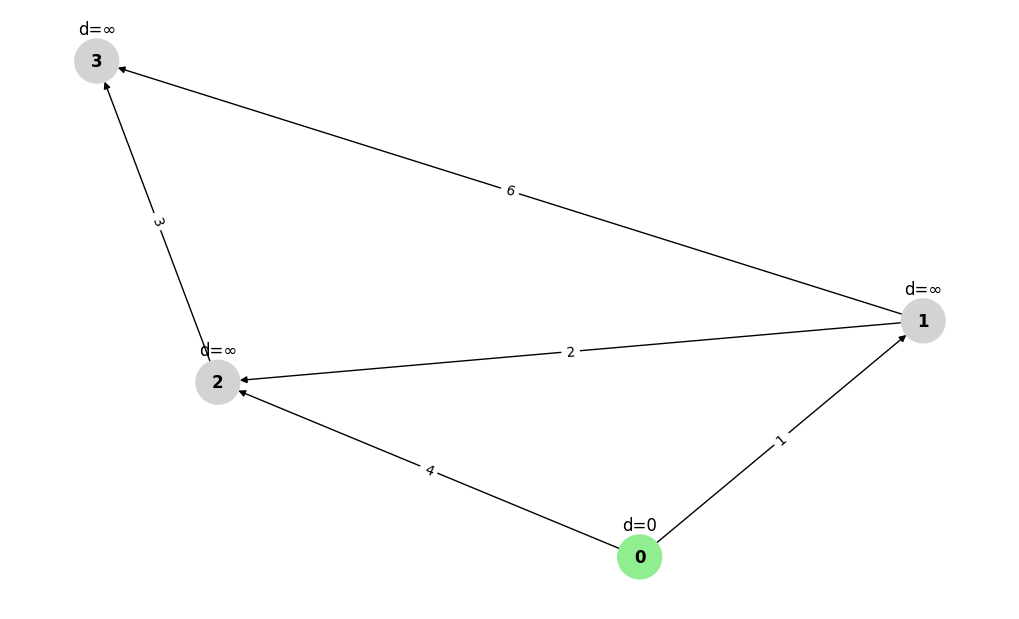

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DAG with edge weights
G = nx.DiGraph()
edges = [
    (0, 1, 1),
    (0, 2, 4),
    (1, 2, 2),
    (1, 3, 6),
    (2, 3, 3)
]

G.add_weighted_edges_from(edges)

# Initial distances
distances = {0: 0, 1: float('inf'), 2: float('inf'), 3: float('inf')}

# Define positions for consistent layout
pos = nx.spring_layout(G, seed=42)

# Node colors based on initial distances
node_colors = ['lightgreen' if distances[node] != float('inf') else 'lightgray' for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Add distance labels above the nodes
distance_labels = {node: f"{dist if dist != float('inf') else '∞'}" for node, dist in distances.items()}
for node, (x, y) in pos.items():
    plt.text(x, y + 0.1, f"d={distance_labels[node]}", horizontalalignment='center', fontsize=12, color='black')
